# Introduction to Colab
## Environment Overview

In [ ]:
# Number for cpu
!nproc

2


In [ ]:
# Amount of Memory
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        534M         10G        984K        1.9G         11G
Swap:            0B          0B          0B


In [ ]:
# OS Type
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [ ]:
# Mounted File systems
!df

Filesystem     1K-blocks     Used Available Use% Mounted on
overlay        236863352 40159824 196687144  17% /
tmpfs              65536        0     65536   0% /dev
tmpfs            6666804        0   6666804   0% /sys/fs/cgroup
shm              6160384        0   6160384   0% /dev/shm
tmpfs            6666804       24   6666780   1% /var/colab
/dev/sda1      243374232 41955072 201402776  18% /etc/hosts
tmpfs            6666804        0   6666804   0% /proc/acpi
tmpfs            6666804        0   6666804   0% /proc/scsi
tmpfs            6666804        0   6666804   0% /sys/firmware


In [ ]:
# user role
!id

uid=0(root) gid=0(root) groups=0(root)


In [ ]:
# Python Version
!python --version

Python 3.7.10


In [ ]:
# List of installed Python package
!pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.10.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
asgiref                       3.3.1         
astor                         0.8.1         
astropy                       4.2           
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         20.3.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.0         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis      

## Sample Python Program

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

### Create pandas data frame with training data

In [ ]:
iris_frame = load_iris()

In [ ]:
# extract raw features
X = pd.DataFrame(iris_frame['data'])

# munge column to more friendly column names
column_names = [
    x.replace(' (cm)', '').replace(' ', '_') for x in iris_frame['feature_names']
]
X.columns = column_names

# show sample of data
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# get target variable and munge into multi-classification form
y = pd.DataFrame(
    [iris_frame['target_names'][target] for target in iris_frame['target']]
)

# set column name
y.columns = ['species']

# show sample
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
# combine features and target into single data frame
training_df = X.join(y)

# show random sample
training_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.6,3.4,1.4,0.3,setosa
0,5.1,3.5,1.4,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
57,4.9,2.4,3.3,1.0,versicolor
100,6.3,3.3,6.0,2.5,virginica
70,5.9,3.2,4.8,1.8,versicolor
19,5.1,3.8,1.5,0.3,setosa
144,6.7,3.3,5.7,2.5,virginica


### Exploratory Data Analysis

In [ ]:
# Explanatory variables
training_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
# Target Variable
training_df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [ ]:
viz_data = pd.melt(training_df, id_vars=['species'], value_vars=[col for col in training_df.columns if col != 'species'])
viz_data.sample(10)

,species,variable,value
47,setosa,sepal_length,4.6
553,virginica,petal_width,1.8
57,versicolor,sepal_length,4.9
208,versicolor,sepal_width,2.9
5,setosa,sepal_length,5.4
110,virginica,sepal_length,6.5
422,virginica,petal_length,6.7
219,versicolor,sepal_width,2.5
213,versicolor,sepal_width,2.9
512,versicolor,petal_width,1.0


Text(0.5, 0.98, 'Box Plot for Features')

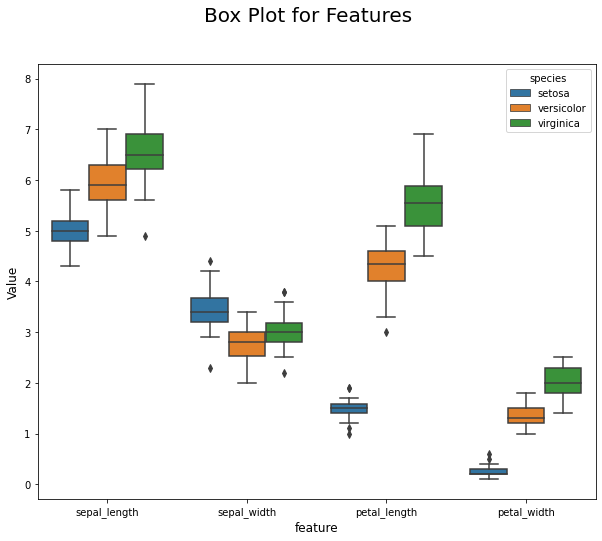

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(x='variable', y='value', hue='species', data=viz_data)
ax.set_xlabel('feature', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
plt.suptitle('Box Plot for Features', fontsize=20)